Computes the [Chebyshev center](https://en.wikipedia.org/wiki/Chebyshev_center) of a polyhedron.
The example is inspired from [here](http://web.cvxr.com/cvx/examples/cvxbook/Ch04_cvx_opt_probs/html/chebyshev_center_2D.html).
The polyhedron is defined by the following inequalities:
\begin{align*}
2x + y & \leq 1\\
2x - y & \leq 1\\
-x +2y & \leq 1\\
-x -2y & \leq 1
\end{align*}

In [1]:
using Polyhedra
h = HalfSpace([2, 1], 1) ∩ HalfSpace([2, -1], 1) ∩ HalfSpace([-1, 2], 1) ∩ HalfSpace([-1, -2], 1)

H-representation Polyhedra.Intersection{Int64,Array{Int64,1},Int64}:
4-element iterator of HalfSpace{Int64,Array{Int64,1}}:
 HalfSpace([2, 1], 1)
 HalfSpace([2, -1], 1)
 HalfSpace([-1, 2], 1)
 HalfSpace([-1, -2], 1)

In [2]:
using GLPK
using JuMP
cheby_center, cheby_radius = chebyshevcenter(h, with_optimizer(GLPK.Optimizer))

([0.0, 0.0], 0.4472135954999579)

In [3]:
using Plots

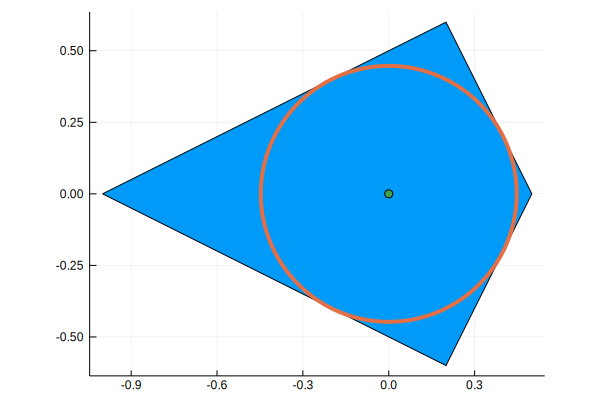

In [4]:
plot(polyhedron(h), axis_ratio=:equal)
α = range(0, stop=2π, length=100)
x = cheby_center[1] .+ cheby_radius .* cos.(α)
y = cheby_center[2] .+ cheby_radius .* sin.(α)
plot!(x, y, linewidth=4)
scatter!([cheby_center[1]], [cheby_center[2]])